## Data Selected and Objective

### The dataset selected for this project contains the information about historical performance of Google stock from 2016 to 2021, which is listed in the NYSE. A top global marketing consulting firm named FinSynetic wants to assess the prospect of Google in the stock market for clients that invested in it, FinSynetic forms a ML prject group responsible for creating a ML model that provides robust performance over long period of time and precise predictions. The objective is to evaluate diffenrent neutral network models and determine the best model to be implemented by FinSynetic for further analysis.

### The overview of the data records day-to-day stock market price, the attributed used are the following:
#### symbol : - Name of the company (in this case Google).
#### date :- year and date
#### close:- closing of stock value
#### high:- highest value of stock at that day
#### low:- lowest value of stock at that day
#### open:- opening value of stock at that day
#### volume - volume traded in the stock market
#### adjClose - adjusted closing price
#### adjHigh - adjusted highest value
#### adjLow - adjusted lowest value
#### adjOpen - adjusted opening value
#### adjVolume - adjusted volume
#### divCash - dividend cash
#### splitFactor - split factor

In [1]:
import pandas as pd
Google_stock = pd.read_csv("GOOG.csv")
Google_stock.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


## Data Preprocessing

In [4]:
## check for missing value
Google_stock.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [6]:
## check for duplicate values
Google_stock.duplicated().sum()

0

In [8]:
## check datatypes
Google_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [10]:
## convert date column to date type
Google_stock['date'] = pd.to_datetime(Google_stock['date'])
Google_stock['date'] = Google_stock['date'].dt.strftime('%d-%m-%Y')
Google_stock['date'] = pd.to_datetime(Google_stock['date'], dayfirst=True)
Google_stock

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [12]:
## Remove symbol column
Google_stock.drop(columns="symbol",axis=1,inplace=True)

In [14]:
## check the attributes again
Google_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1258 non-null   datetime64[ns]
 1   close        1258 non-null   float64       
 2   high         1258 non-null   float64       
 3   low          1258 non-null   float64       
 4   open         1258 non-null   float64       
 5   volume       1258 non-null   int64         
 6   adjClose     1258 non-null   float64       
 7   adjHigh      1258 non-null   float64       
 8   adjLow       1258 non-null   float64       
 9   adjOpen      1258 non-null   float64       
 10  adjVolume    1258 non-null   int64         
 11  divCash      1258 non-null   float64       
 12  splitFactor  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(2)
memory usage: 127.9 KB


In [16]:
# Provide statistical summary
Google_stock.describe()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,2018-12-12 03:26:02.480126976,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
min,2016-06-14 00:00:00,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,2017-09-12 06:00:00,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,2018-12-11 12:00:00,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,2020-03-12 18:00:00,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2021-06-11 00:00:00,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0
std,NaN,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0


In [18]:
## Feature selection and set date as index
df = Google_stock.loc[:,["date","close","high","low","open","volume"]]
df=df.set_index("date")
df

,close,high,low,open,volume
date,,,,,
2016-06-14,718.27,722.470,713.1200,716.48,1306065
2016-06-15,718.92,722.980,717.3100,719.00,1214517
2016-06-16,710.36,716.650,703.2600,714.91,1982471
2016-06-17,691.72,708.820,688.4515,708.65,3402357
2016-06-20,693.71,702.480,693.4100,698.77,2082538
...,...,...,...,...,...
2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453
2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253
2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337


## Model Selection

In [23]:
## import libraries
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dense, Dropout, Input

In [24]:
# choose close as relevant attributes
train_set = df.iloc[:,:4]

# standardize using Min-Max Scaler
Scaler = MinMaxScaler()
train_normal = Scaler.fit_transform(train_set)

# split the dataset into training set and testing set, with time step of 60
training_size = round(len(train_normal) * 0.80)

train_data = train_normal[:training_size]
test_data  = train_normal[training_size-60:]
train_data = pd.DataFrame(train_data,columns=train_set.columns)
test_data = pd.DataFrame(test_data,columns=train_set.columns)
print(train_data.shape,test_data.shape)

(1006, 4) (312, 4)


In [26]:
# create training data sequence and label
import numpy as np
def create_sequence(dataset):
    sequences = []
    labels = []
    
    start_idx = 0

    for stop_idx in range(60,len(dataset)):
        sequences.append(dataset.iloc[start_idx:stop_idx])
        labels.append(dataset.iloc[stop_idx])
        start_idx += 1
    return (np.array(sequences),np.array(labels))

train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

print(train_seq.shape, train_label.shape)
print(test_seq.shape, test_label.shape)

(946, 60, 4) (946, 4)
(252, 60, 4) (252, 4)


### LSTM

In [28]:
model = Sequential([
    Input(shape=(train_seq.shape[1], train_seq.shape[2])),
    LSTM(units=60, return_sequences=True),
    Dropout(0.2),
    LSTM(units=60, return_sequences=True),
    Dropout(0.2),
    LSTM(units=60),
    Dropout(0.2),
    Dense(units=4)
])

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 60)         │        15,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 60)         │        29,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 60)             │        29,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │           244 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,924 (288.77 KB)

 Trainable params: 73,924 (288.77 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# fit the model with batch size of 20 over 50 epoches
epochs = 50
batch_size = 20

history = model.fit(
    train_seq,
    train_label,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(test_seq, test_label),
    verbose=1
)

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - accuracy: 0.2342 - loss: 0.0162 - val_accuracy: 0.7341 - val_loss: 0.0178
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.2757 - loss: 0.0023 - val_accuracy: 0.7341 - val_loss: 0.0171
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.2497 - loss: 0.0018 - val_accuracy: 0.7341 - val_loss: 0.0177
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.2657 - loss: 0.0018 - val_accuracy: 0.7341 - val_loss: 0.0164
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.2703 - loss: 0.0017 - val_accuracy: 0.7341 - val_loss: 0.0075
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.2423 - loss: 0.0013 - val_accuracy: 0.6944 - val_loss: 0.0084
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.2247 - loss: 0.0012 - val_accuracy: 0.7341 - val_loss: 0.0105
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.2590 - loss: 0.0013 - val_accuracy: 0.7341 -

In [36]:
model.export("ml_model", format='tf_saved_model')  

INFO:tensorflow:Assets written to: ml_model\assets


INFO:tensorflow:Assets written to: ml_model\assets


Saved artifact at 'ml_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 60, 4), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  2573076702672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2573076703632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2573076704208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2573076702288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2573076703824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2573076702864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2573076704592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2573076704016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2573076705744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2573076706320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2573076705552: TensorSpec(shape=(), dtype=tf.res

In [38]:
reloaded_artifact = tf.saved_model.load("ml_model")
predictions = reloaded_artifact.serve(test_seq)

In [40]:
test_inverse_predicted = Scaler.inverse_transform(predictions)
test_inverse_predicted = pd.DataFrame(test_inverse_predicted,columns=['close','high','low','open'],index=train_set.iloc[-252:].index)
test_inverse_predicted

,close,high,low,open
date,,,,
2020-06-12,1435.926533,1453.960130,1414.196260,1437.008179
2020-06-15,1422.613190,1440.728679,1399.658479,1422.959808
2020-06-16,1405.841270,1424.399945,1381.843826,1405.582114
2020-06-17,1405.125661,1424.388614,1381.483873,1405.210937
2020-06-18,1415.502331,1435.230291,1392.779728,1416.308236
...,...,...,...,...
2021-06-07,2269.039086,2300.745717,2227.428139,2264.510083
2021-06-08,2297.525164,2328.934055,2257.217044,2292.778656
2021-06-09,2329.154489,2359.265701,2289.737259,2323.797188


In [42]:
print("Evaluate the model")
model.evaluate(test_seq,test_label,batch_size=batch_size,verbose=1)

Evaluate the model
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7418 - loss: 9.9587e-04


[0.0022448545787483454, 0.7341269850730896]

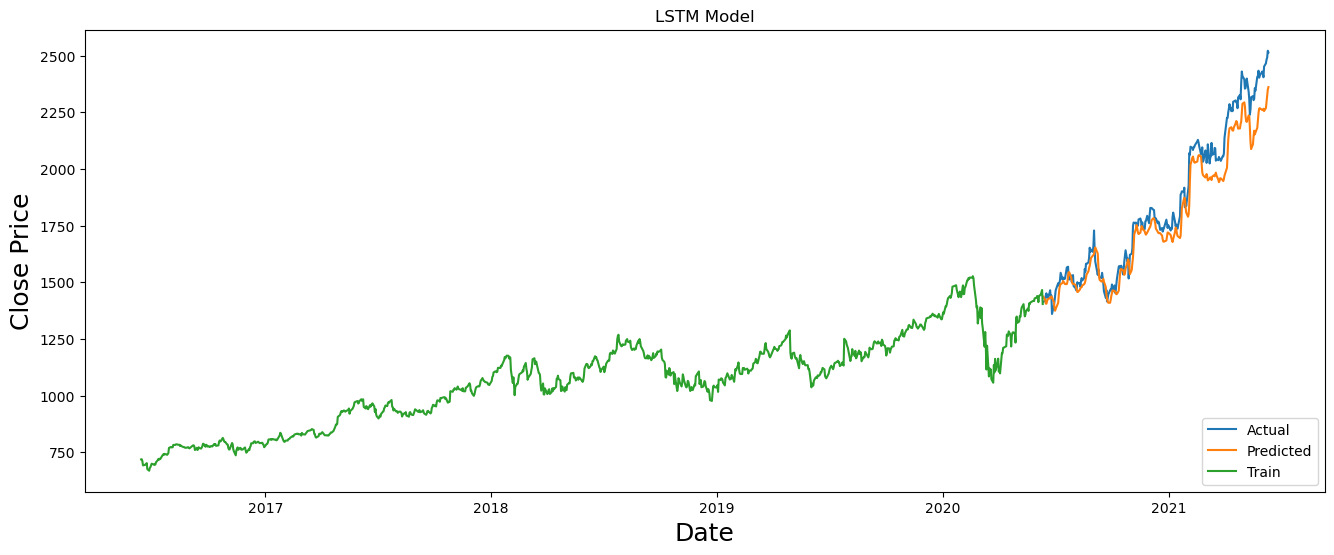

In [44]:
actual = train_set[-252:]
train = train_set[:-252]
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train_set.index[-252:],actual['close'])#We use index bc we set the date to our index
plt.plot(train_set.index[-252:],test_inverse_predicted[['close']])
plt.plot(train_set.index[:-252],train['close'])
plt.legend(['Actual', 'Predicted',"Train"], loc='lower right')
plt.show()

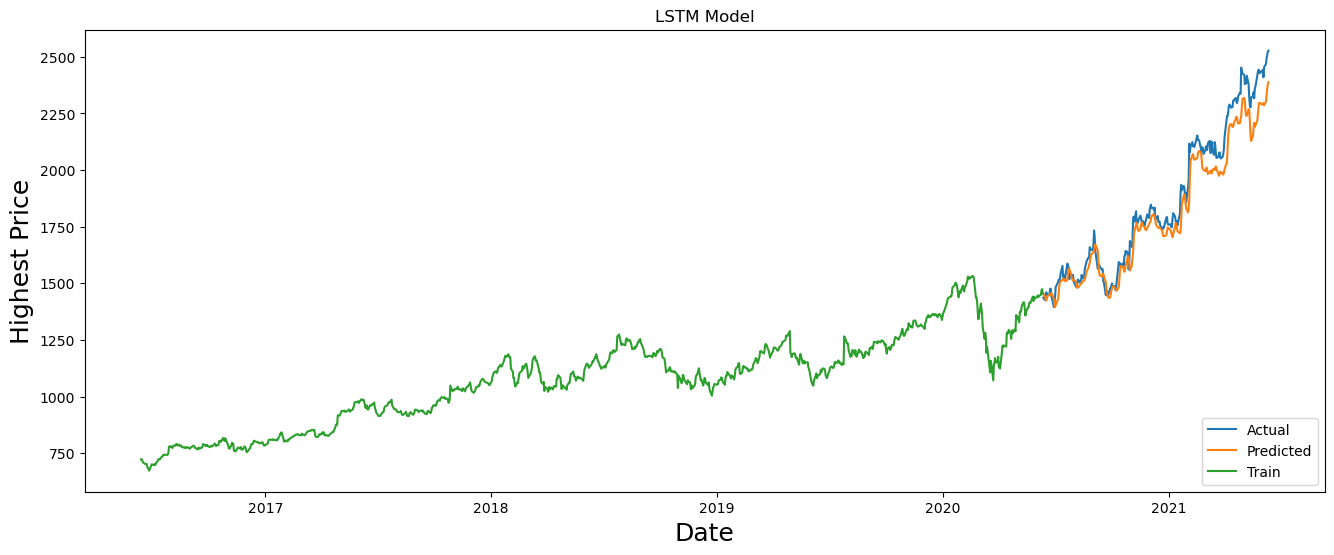

In [46]:
actual = train_set[-252:]
train = train_set[:-252]
plt.figure(figsize=(16,6))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Highest Price', fontsize=18)
plt.plot(train_set.index[-252:],actual['high'])#We use index bc we set the date to our index
plt.plot(train_set.index[-252:],test_inverse_predicted[['high']])
plt.plot(train_set.index[:-252],train['high'])
plt.legend(['Actual', 'Predicted',"Train"], loc='lower right')
plt.show()

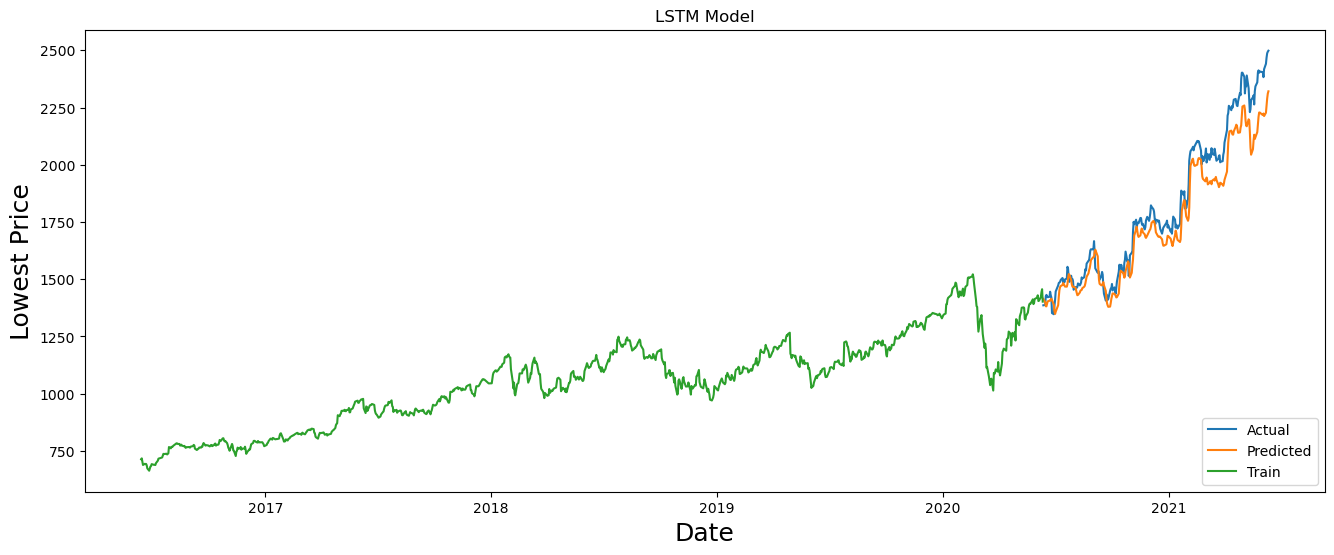

In [48]:
plt.figure(figsize=(16,6))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Lowest Price', fontsize=18)
plt.plot(train_set.index[-252:],actual['low'])#We use index bc we set the date to our index
plt.plot(train_set.index[-252:],test_inverse_predicted[['low']])
plt.plot(train_set.index[:-252],train['low'])
plt.legend(['Actual', 'Predicted',"Train"], loc='lower right')
plt.show()

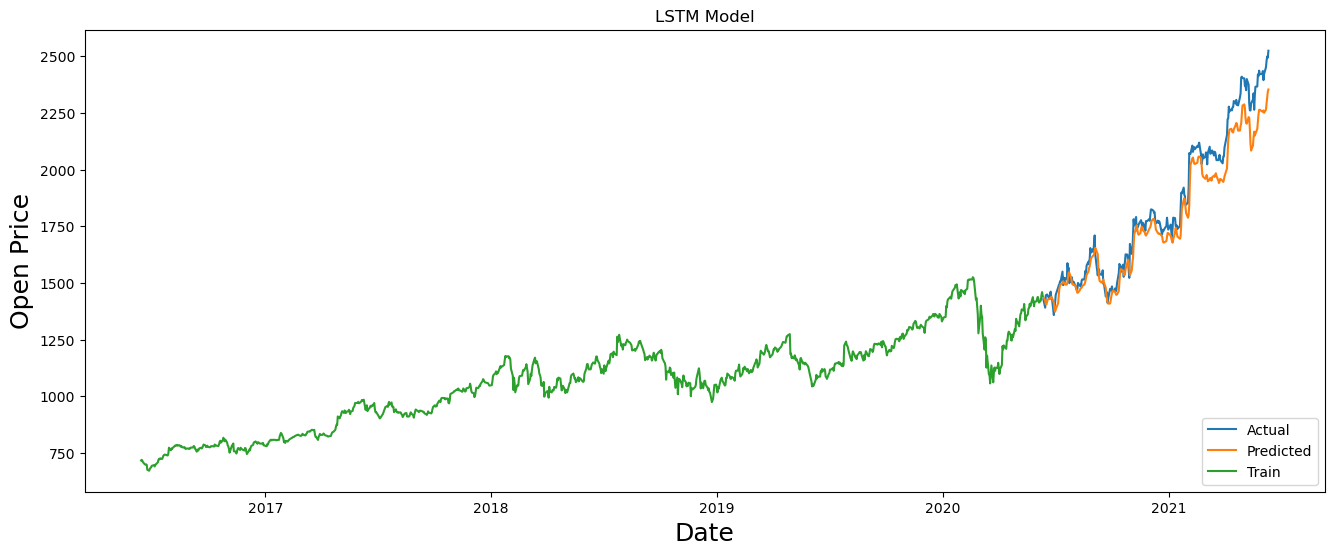

In [50]:
plt.figure(figsize=(16,6))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price', fontsize=18)
plt.plot(train_set.index[-252:],actual['open'])#We use index bc we set the date to our index
plt.plot(train_set.index[-252:],test_inverse_predicted[['open']])
plt.plot(train_set.index[:-252],train['open'])
plt.legend(['Actual', 'Predicted',"Train"], loc='lower right')
plt.show()

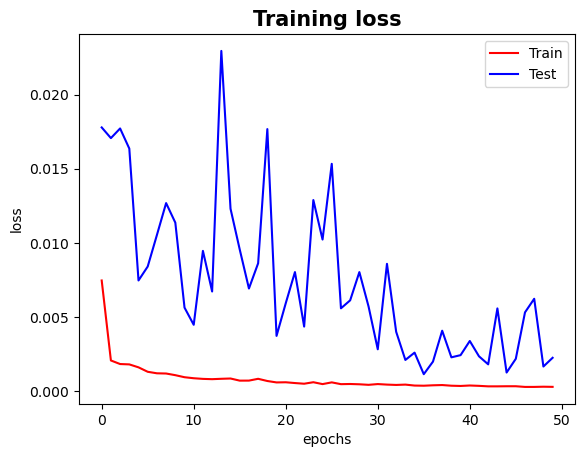

<Figure size 640x480 with 0 Axes>

In [52]:
loss = history.history['loss']
test = history.history['val_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Train')
plt.plot(epochs, test, 'b', label='Test')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title('Training loss', size=15, weight='bold')
plt.legend(loc=0)
plt.figure()

plt.show()

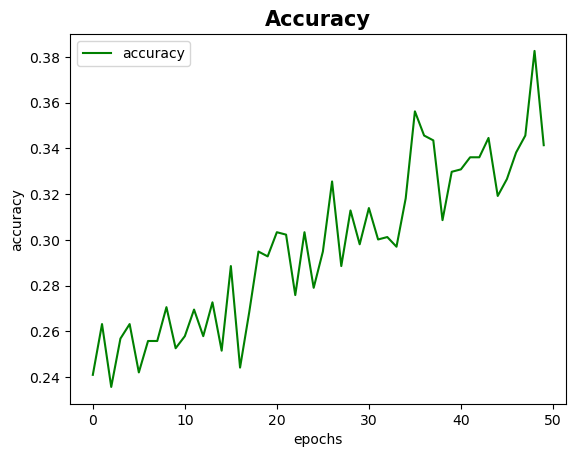

<Figure size 640x480 with 0 Axes>

In [54]:
MAE = history.history['accuracy']

epochs = range(len(loss))

plt.plot(epochs, MAE, 'g', label='accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title('Accuracy', size=15, weight='bold')
plt.legend(loc=0)
plt.figure()

plt.show()

In [56]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
y_test = np.array(actual)
r2Score_test = r2_score(y_test, test_inverse_predicted)
print('test R2 Score: %.2f ' % (r2Score_test))

rmse = np.sqrt(np.mean(((test_inverse_predicted - y_test) ** 2)))
print("RMSE score: %.2f" % (rmse))

test R2 Score: 0.93 
RMSE score: 87.57


## Reference

### https://www.kaggle.com/datasets/shreenidhihipparagi/google-stock-prediction